# Session 3

# 1. Logistic Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
path = "C:/Users/Damoon/Dropbox (work)/McGill Teaching/data/"
print(path)
filename = path + "Default.xlsx"
print (filename)

C:/Users/Damoon/Dropbox (work)/McGill Teaching/data/
C:/Users/Damoon/Dropbox (work)/McGill Teaching/data/Default.xlsx


In [6]:
data = pd.read_excel(filename)

In [8]:
# data.head(7)

In [10]:
list(data)
# data.columns

['default', 'student', 'balance', 'income']

In [11]:
data['default'].factorize()

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [16]:
data.default.factorize()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
data["default_factor"] = data.default.factorize()[0]

In [21]:
data.columns.values.tolist()

['default', 'student', 'balance', 'income', 'default_factor']

In [13]:
data.head()

,default,student,balance,income,default_factor
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn import metrics

In [27]:
X = data[["balance"]]

In [28]:
y = data["default_factor"]

In [29]:
logreg = LogisticRegression()

In [30]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = logreg.predict(X)

In [33]:
logreg.score(X, y_pred)

1.0

In [34]:
logreg.score(X,y)

0.9726

## Confusion Matrix 

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y, y_pred))

[[9639   28]
 [ 246   87]]


 <span style="color:red"> **Exercise:**</span>
 
 Plot the probability values.

## Precision, Recall, F-Scores, Support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [40]:
from sklearn.metrics import classification_report
#from sklearn.metrics *

In [41]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      9667
          1       0.76      0.26      0.39       333

avg / total       0.97      0.97      0.97     10000



**Interpretation?** 


## ROC Curve

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [53]:
# logreg.predict_proba(X)[:,:]

In [54]:
logit_roc_auc = roc_auc_score(y, logreg.predict(X))

In [55]:
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])

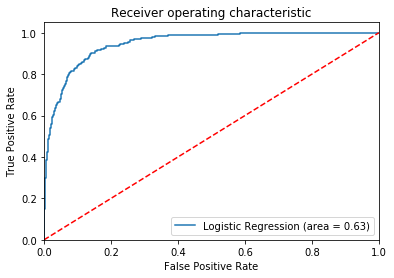

In [59]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Prediction for Hypothetical Future "Balance" values

In [57]:
import numpy as np

In [67]:
X_pred = np.array([1500,2000])
print(X_pred)

[1500 2000]


In [68]:
X_pred = X_pred.reshape(-1,1)
print(X_pred)

[[1500]
 [2000]]


In [70]:
print(logreg.predict_proba(X_pred))
print(logreg.predict(X_pred))


[[0.90815806 0.09184194]
 [0.4750484  0.5249516 ]]
[0 1]


# 2. Linear Discriminant Analysis

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
X = data[["balance"]]

In [74]:
y = data["default_factor"]

In [75]:
lda = LinearDiscriminantAnalysis()

In [76]:
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [77]:
lda.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
X_pred = np.array([1500,2000])
print(X_pred)

[1500 2000]


In [79]:
X_pred = X_pred.reshape(-1,1)
print(X_pred)

[[1500]
 [2000]]


In [80]:
print(lda.predict_proba(X_pred))

[[0.9119783  0.0880217 ]
 [0.50986471 0.49013529]]


# 3. Quadratic Discriminant Analysis

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [82]:
qda = QuadraticDiscriminantAnalysis()

In [83]:
qda.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [84]:
print(qda.predict_proba(X_pred))

[[0.89830669 0.10169331]
 [0.47945471 0.52054529]]


In [85]:
X_pred2 = np.array([1000,1200,1400,1500,1600,2000])

In [86]:
X_pred2 = X_pred2.reshape(-1,1)
print(X_pred2)

[[1000]
 [1200]
 [1400]
 [1500]
 [1600]
 [2000]]


In [87]:
print(qda.predict_proba(X_pred2))

[[0.99544129 0.00455871]
 [0.9818272  0.0181728 ]
 [0.93959197 0.06040803]
 [0.89830669 0.10169331]
 [0.83897876 0.16102124]
 [0.47945471 0.52054529]]


In [88]:
print(qda.predict(X_pred2))

[0 0 0 0 0 1]
